## Kasus - Klasifikasi Tulisan Tangan dengan Dataset MNIST

### Deskripsi Umum

Anda diminta untuk melakukan klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM untuk merekognisi tulisan tangan dari dataset MNIST.

### Tentang Dataset MNIST
Dataset MNIST (Modified National Institute of Standards and Technology) merupakan dataset berupa citra grayscale dengan ukuran 28x28 yang berisi tulisan tangan dari digit angka 0-9. Jumlah data dalam dataset ini adalah 70.000 data.

### Detail Kuis
1. Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset MNIST yang digunakan? Jelaskan jawaban kelompok Anda dan buktikan!

2. Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya. Anda dapat menggunakan referensi dari Job Sheet 03.

3. Lakukan proses ekstraksi fitur pada data MNIST. Pada proses ini, Anda diperbolehkan untuk

     - Langsung menggunakan nilai asli dari citra (nilai asli setiap pixel dari dataset) sebagai fitur.
    - Melakukan ekstraksi fitur lain seperti histogram, PCA, atau yang lainnya. Anda diperbolehkan melakukan ekspolarasi pada proses ini.
4. Buatlah data training dan data testing menggunakan rasio 70:30, 80:20, 90:10.

5. Lakukan proses klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM.

    - Anda diperbolehkan untuk melakukan tunning parameter.
    - Anda diperbolehkan mengeksplorasi jenis kernel yang digunakan pada SVM.
6. Evaluasi model yang Anda buat terhadap data training dan data testing.

    - Gunakan metric accuracy untuk mengetahui tingkat akurasi data training dan data testing.
    - Gunakan fungsi classification_report untuk mengetahui performa model secara holistik.
    - Gunakan confusion matrix untuk mengetahui tingkat ketepatan pelabelan.
7. Tampilkan citra data testing berserta hasil pelabelannya. Anda dapat menggunakan Job Sheet 03 sebagai acuan.

8. Apa model terbaik yang Anda dapatkan? Bagaimana konfigurasinya? Berapa tingkat akurasi yang didapatkan? Jelaskan!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline
from sklearn.datasets import fetch_openml

In [2]:
mnist = datasets.fetch_openml("mnist_784")

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


### Nomor 1 Explorasi Data

Jumlah data setiap label:
Label 0: 6903 data
Label 1: 7877 data
Label 2: 6990 data
Label 3: 7141 data
Label 4: 6824 data
Label 5: 6313 data
Label 6: 6876 data
Label 7: 7293 data
Label 8: 6825 data
Label 9: 6958 data


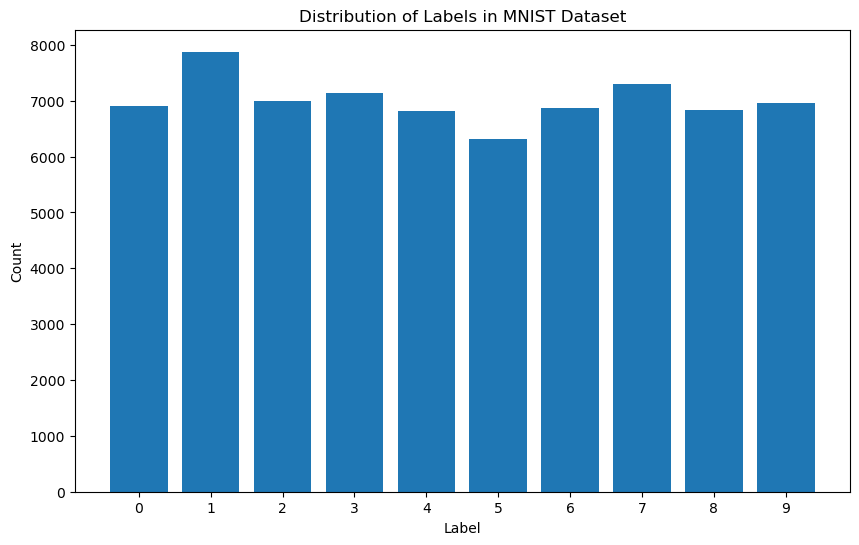

In [3]:
labels, counts = np.unique(mnist.target, return_counts=True)
print("Jumlah data setiap label:")
for label, count in zip(labels, counts):
    print(f"Label {label}: {count} data")

plt.figure(figsize=(10, 6))
plt.bar(labels, counts, tick_label=labels)

# Adding labels and title
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels in MNIST Dataset')

# Show the plot
plt.show()

### Melihat persentase distribusi

In [4]:
import pandas as pd

# Data kelas Anda dalam bentuk dictionary
data = {
    'Label': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'Jumlah Data': [6903, 7877, 6990, 7141, 6824, 6313, 6876, 7293, 6825, 6958]
}

# Membuat DataFrame dari data
df = pd.DataFrame(data)

# Menghitung total jumlah data
total_data = df['Jumlah Data'].sum()

# Menambahkan kolom "Persentase" yang berisi persentase distribusi
df['Persentase'] = (df['Jumlah Data'] / total_data) * 100

# Menampilkan DataFrame
print(df)

   Label  Jumlah Data  Persentase
0      0         6903    9.861429
1      1         7877   11.252857
2      2         6990    9.985714
3      3         7141   10.201429
4      4         6824    9.748571
5      5         6313    9.018571
6      6         6876    9.822857
7      7         7293   10.418571
8      8         6825    9.750000
9      9         6958    9.940000


In [5]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [6]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

### Nomor 2 Menampilkan 15 citra pertama beserta labelnya

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


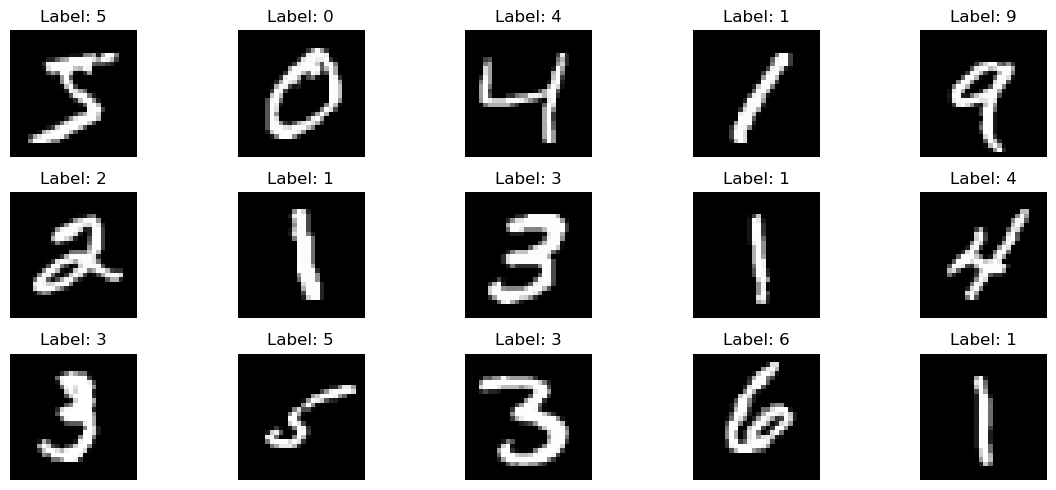

In [7]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

# Mengunduh dataset MNIST
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

# Mengambil data dan label
X = mnist.data
y = mnist.target

# Menampilkan 15 citra pertama berserta labelnya
plt.figure(figsize=(12, 5))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X[i].reshape(28, 28), cmap='gray')
    plt.title(f'Label: {y[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

### Nomor 3 Ekstraksi Fitur
### Menggunakan PCA untuk mengurangi dimensi dan menggunakan svc sebagai classifier

In [8]:
pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
# svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca)

In [10]:
# pemisahan data training dan data testing
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2,random_state=42)

In [11]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(Xtrain, ytrain)

MultinomialNB()

In [12]:
y_train_pred = mnb.predict(Xtrain)

# Evaluasi akurasi training
acc_train = accuracy_score(ytrain, y_train_pred)

# Prediksi test data
y_test_pred = mnb.predict(Xtest)

# Evaluasi model dengan metric akurasi
acc_test = accuracy_score(ytest, y_test_pred)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.8266785714285714
Hasil akurasi data test: 0.829


In [13]:
# pemisahan data training dan data testing
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3,random_state=42)

In [14]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(Xtrain, ytrain)

MultinomialNB()

In [15]:
y_train_pred = mnb.predict(Xtrain)

# Evaluasi akurasi training
acc_train = accuracy_score(ytrain, y_train_pred)

# Prediksi test data
y_test_pred = mnb.predict(Xtest)

# Evaluasi model dengan metric akurasi
acc_test = accuracy_score(ytest, y_test_pred)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.8278979591836735
Hasil akurasi data test: 0.8257142857142857


In [16]:
# pemisahan data training dan data testing
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.1,random_state=42)

In [17]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(Xtrain, ytrain)

MultinomialNB()

In [18]:
y_train_pred = mnb.predict(Xtrain)

# Evaluasi akurasi training
acc_train = accuracy_score(ytrain, y_train_pred)

# Prediksi test data
y_test_pred = mnb.predict(Xtest)

# Evaluasi model dengan metric akurasi
acc_test = accuracy_score(ytest, y_test_pred)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.8268412698412698
Hasil akurasi data test: 0.8294285714285714


In [19]:
print("MultinominalNB score: ",mnb.score(Xtest, ytest))

MultinominalNB score:  0.8294285714285714


In [20]:
print(classification_report(ytest, y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92       683
           1       0.86      0.94      0.90       800
           2       0.87      0.82      0.85       674
           3       0.79      0.82      0.81       760
           4       0.83      0.74      0.79       611
           5       0.88      0.69      0.77       658
           6       0.86      0.91      0.89       677
           7       0.95      0.82      0.88       724
           8       0.67      0.76      0.71       693
           9       0.72      0.85      0.78       720

    accuracy                           0.83      7000
   macro avg       0.84      0.83      0.83      7000
weighted avg       0.84      0.83      0.83      7000



Text(113.9222222222222, 0.5, 'predicted label')

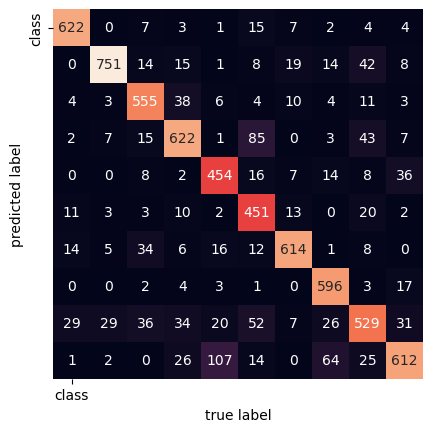

In [21]:
# bentuk confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(ytest, y_test_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=mnist.target_names,
            yticklabels=mnist.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

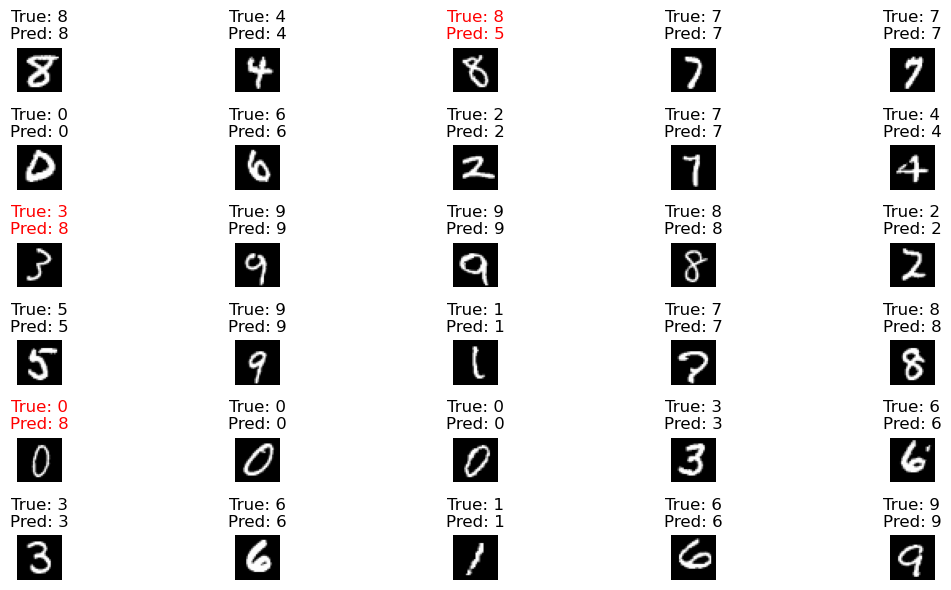

In [22]:
n_samples_to_display = 30
# Display images with true labels and predicted labels
plt.figure(figsize=(12, 6))
for i in range(n_samples_to_display):
    plt.subplot(6, 5, i + 1)
    plt.imshow(Xtest[i].reshape(28, 28), cmap="gray")

    # Determine text color based on true or predicted
    true_label = ytest.iloc[i] if isinstance(ytest, pd.Series) else ytest[i]
    pred_label = y_test_pred.iloc[i] if isinstance(y_test_pred, pd.Series) else y_test_pred[i]

    if true_label == pred_label:
        text_color = 'black'
    else:
        text_color = 'red'

    plt.title(f"True: {true_label}\nPred: {pred_label}", color=text_color)
    plt.axis("off")

plt.tight_layout()
plt.show()